In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Nov 23 15:33:48 2021

@author: hannohennighausen
"""

import hexalattice.hexalattice as hex
import numpy as np
import matplotlib.pyplot as plt
from pathlib import  Path
import imageio as iio
import pandas as pd
import seaborn as sns

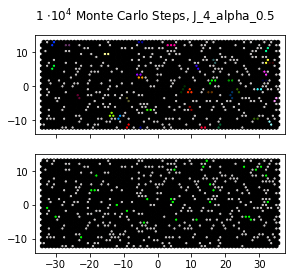

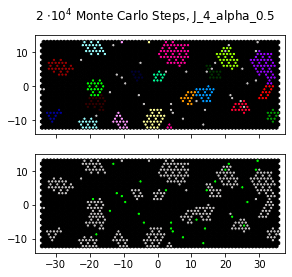

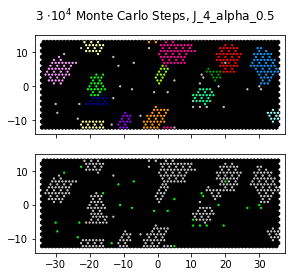

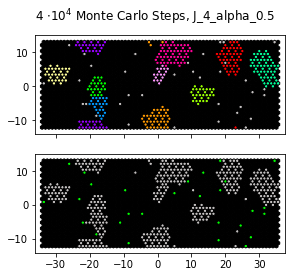

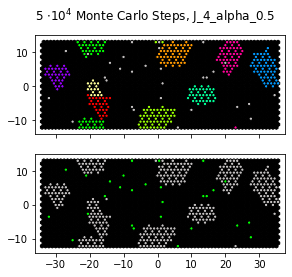

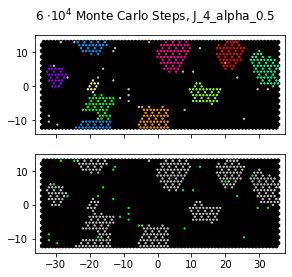

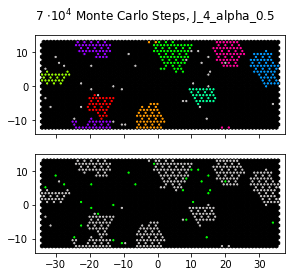

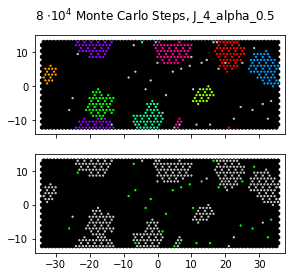

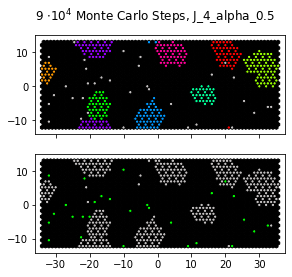

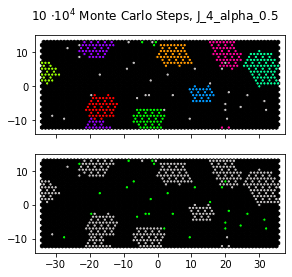

IndexError: index 10 is out of bounds for axis 0 with size 10

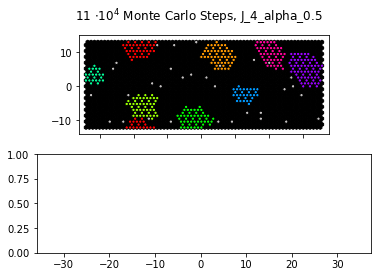

In [15]:
color_scale=[[0,0,1],[0,1,0],[1,0,0],[1,0,0.6],[1,0.6,0],[0.6,1,0],[0,1,0.6],[0,0.6,1],[0.6,0,1],[1,1,0.6],[1,0.6,1],[0.6,1,1],[0,0,0.6],[0,0.6,0],[0.6,0,0],
             [0,0,0.2],[0,0.2,0],[0.2,0,0],[1,0,0.2],[1,0.2,0],[0.2,1,0],[0,1,0.2],[0,0.2,1],[0.2,0,1],[1,1,0.2],[1,0.2,1],[0.2,1,1],
             [0,0.4,0.2],[0,0.2,0.4],[0.2,0.4,0],[0.4,0,0.2],[0.4,0.2,0],[0.2,0.4,0],[0.4,0.4,0.2],[0.4,0.2,0.4],[0.2,0.4,0.4],[0.4,1,0.2],[0.4,0.2,1],[0.2,1,0.4]]
alpha = 0.5
density=0.2
run = 8
index = 4
off = 0.03
FrzB = 28
for run in [20]:
    for J in [4]:
        for titration in [1]:
            # labels = np.loadtxt(f'/scratch2/hannohennighausen/Parameter_sweep/rectangular_outputlabels_{J}_{alpha}_0.2_11.txt',dtype=int,skiprows=1)
            labels = np.loadtxt(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}.txt',dtype=int,skiprows=1)
            Frz = np.loadtxt(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_flags_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}.txt',dtype=int,skiprows=1)
            Path(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}').mkdir( exist_ok=True)
            Nx,Ny=np.loadtxt(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}.txt',dtype=int,max_rows=1)
            saved_steps = int(labels.shape[0]/3)
  
            for step in range(0,saved_steps):
                
                # if step in [1,10,49]:
                #     cluster_size = np.bincount(labels[step*3])
                #     cluster_size_distribution = np.bincount(cluster_size[1:])
                #     plt.figure()
                #     plt.bar(np.arange(cluster_size_distribution.size), cluster_size_distribution)
                #     plt.ylim((0,55))
                #     plt.suptitle('cluster size distribution')
                #     plt.title(f'J={J}, alpha={alpha},density={density}')
                #     plt.savefig(f'/home/hannohennighausen/Documents/frz_lattice_model/Python_analysis/image_{J}_{alpha}/hist_{step}_{J}_{alpha}_{density}.svg')
                #     plt.show()
                
                colors_labels = np.zeros([int(Nx)*int(Ny),3])
                coloring_labels = np.zeros([int(Nx)*int(Ny),3])
                colors_Frz=np.zeros([int(Nx)*int(Ny),3])
                i=0
                j=0
                ii=0
                
                for x in labels[step*3+1]:
                    if labels[step*3,j]==0:
                        coloring_labels[x]=[195/255,192/255,192/255] 
                    else:
                        coloring_labels[x]=color_scale[labels[step*3,j]%39]
                    j+=1
                fig, axs = plt.subplots(2,sharex=(True))
                # plt.figure(figsize=(20,15))
                hex_centers, _ = hex.create_hex_grid(nx= int(Nx),ny=int(Ny), face_color=coloring_labels,do_plot=True,h_ax=axs[0])
                centers_x = hex_centers[:, 0]
                centers_x = hex_centers[:, 1]
                # plt.suptitle(f'{step}')
                fig.suptitle(f'{(step+1)} $\cdot 10^4$ Monte Carlo Steps, J_{J}_alpha_{alpha}')
                #plt.savefig(f'D:/Hanno/Physics/Marburg/Murray/frz_lattice_model/rand_grid_19899+{row}.png')
                # plt.savefig(f'/home/hannohennighausen/Documents/frz_lattice_model/Python_analysis/FrzB_test_{run}_image_{J}_{alpha}_{density}/label_{step}.jpg')
                # plt.show()
                
                # for x in labels[step*3+1]:
            
                #     # else:
                #     #     coloring_labels[x]=[195/255,192/255,192/255]
                #         # labels_name[x]=labels[0,i]
                #     if labels[step*3+2,i]==1:
                #         colors_labels[x]=[195/255,192/255,192/255]  
                #     elif labels[step*3+2,i]==2:
                #         colors_labels[x]=[0, 1, 0]
                #     elif labels[step*3+2,i]==3:
                #         colors_labels[x]=[1,0,0]
                #     elif labels[step*3+2,i]==4:
                #         colors_labels[x]=[0,0,1]
                #     i+=1
                    
            
                # # plt.figure(figsize=(20,15))
                # hex_centers, _ = hex.create_hex_grid(nx= int(Nx),ny=int(Ny), face_color=colors_labels,do_plot=True,h_ax=axs[2])
                # centers_x = hex_centers[:, 0]
                # centers_x = hex_centers[:, 1]
                # #plt.savefig(f'D:/Hanno/Physics/Marburg/Murray/frz_lattice_model/rand_grid_19899+{row}.png')
                # # plt.savefig(f'{counter}_labels_{step}_{J}_{alpha}_{density}.svg')
            
                # # plt.show()
                
                for x in labels[step*3+1]:
            
                    # else:
                    #     coloring_labels[x]=[195/255,192/255,192/255]
                        # labels_name[x]=labels[0,i]
                    if Frz[step,ii]==0:
                        colors_Frz[x]=[195/255,192/255,192/255]  
                    elif Frz[step,ii]==1:
                        colors_Frz[x]=[0, 1, 0]
                    elif Frz[step,ii]==2:
                        colors_Frz[x]=[0, 0, 1]
                    elif Frz[step,ii]==3:
                        colors_Frz[x]=[1, 0, 0]
                    ii+=1
                    
            
                # plt.figure(figsize=(20,15))
                
                hex_centers, axs[1] = hex.create_hex_grid(nx= int(Nx),ny=int(Ny), face_color=colors_Frz,do_plot=True,h_ax=axs[1])
                centers_x = hex_centers[:, 0]
                centers_x = hex_centers[:, 1]
                
                # plt.title(f'{step}')
                plt.savefig(f'/home/subraman/Documents/Github_projects/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}/Frz_B_{step}.jpg')
                #plt.savefig(f'D:/Hanno/Physics/Marburg/Murray/frz_lattice_model/rand_grid_19899+{row}.png')
                # plt.savefig(f'{counter}_labels_{step}_{J}_{alpha}_{density}.svg')
            
                plt.show()
            



In [ ]:
images=[]
for step in range(0,saved_steps):
    print(step)
    im = iio.imread(f"C:/Users/sssri/Documents/GitHub/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}/Frz_B_{step}.jpg")
    images.append(im)
    iio.mimsave(f'C:/Users/sssri/Documents/GitHub/frz_lattice_simulation/{index}_dFrzB_labels_J_{J}_alpha_{alpha}_FrzB_{FrzB}_off_{off}/Frz_B_simulations.gif', images, duration=0.8)


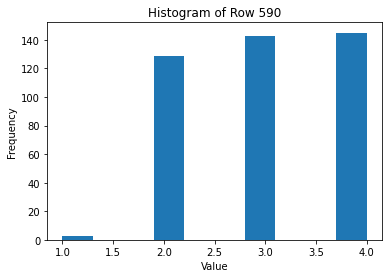

In [17]:
# Histogram
import matplotlib.pyplot as plt


# Choose a row to plot (e.g. the first row)
row_index = 590
row_data = labels[row_index]

# Create histogram
plt.hist(row_data)

# Add title and axis labels
plt.title("Histogram of Row {}".format(row_index))
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show the plot
plt.show()


In [8]:
labels[0]

array([ 0,  0,  0,  1,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  3,
        4,  0,  0,  0,  0,  3,  0,  0,  0,  0,  5,  0,  0,  0,  0,  0,  0,
        0,  0,  4,  0,  0,  6,  0,  0,  0,  7,  0,  8,  0,  0,  9,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 11,  0,  0,  0, 12,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  8,  0,  0,
        0,  0,  0,  0, 13, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15, 16,
        0,  0,  0, 17,  0,  0,  0, 18,  0,  0,  0, 19,  0, 20, 21,  0,  0,
        0,  0,  0,  0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, 21,  0,  0,  0,  0,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,
       24,  0,  0,  0,  0, 24, 25, 26,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        0, 27,  0,  0, 23,  0,  0,  0,  0,  0,  0,  0,  0,  0, 14,  0,  0,
        0,  0,  0,  0, 28,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0, 29,
        0,  0,  0,  0,  0